# Teil 2: Simulation
Mit diesem Jupiter Notebook kann man din Temperaturverlauf für einen Ort simulieren.
Die Genauigkeit ist aufgrund der vielen Annahmen und Vereinfachungen fragwürdig.
Man kann aber gut sehen das when man den Treibhausfaktor auf 0 setzt es schlagartig kälter wird.

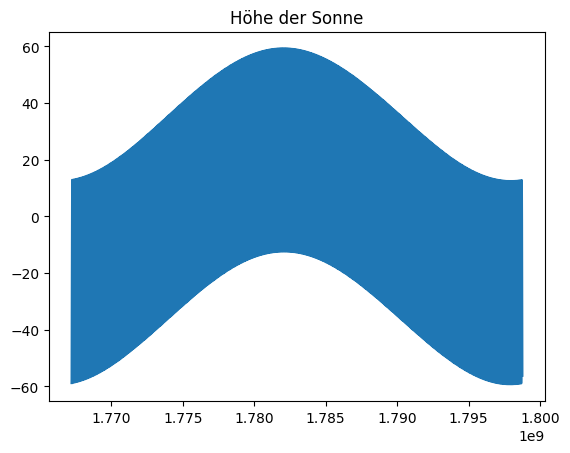

In [77]:
import sun_position_calculator
import matplotlib.pyplot as plt
import numpy as np

start = 1767222000 # 01.01.2026 00:00
ende = 1798754400 # 31.12.2026 23:00
interval = 3600 # 1 Stunde

# Greifswald
laenge = 13.38786 # o. L.
breite = 54.09311 # n. Br.

sun_position_calculator_factory = sun_position_calculator.SunPositionCalculator()

sonnen_hoehen = []
zeiten = []
for t in range(start, ende+3600, interval):
    zeiten.append(t)
    sonnen_hoehen.append(np.degrees(
        sun_position_calculator_factory.pos(t*1000, breite, laenge).altitude
    ))

plt.title("Höhe der Sonne")
plt.plot(zeiten, sonnen_hoehen)
plt.show()


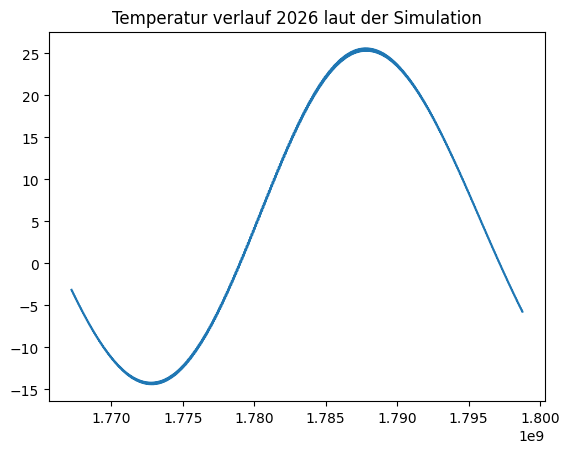

In [82]:
# Konstanten
solar_konstante = 1360.8 # I_0
stefan_bolzmann_konstane = 5.670374419e-8 # sigma

# Annahmen
surface_heat_capacity = 4e7 # C_s
albedo = 0.2 # a
emissivity = 0.9 # epsilon
treibhaus_faktor = 0.3 # f_thg

# Wir brauchen eine Starttemperatur 
temperatur = 270.0 # Kelvin

temperaturen = []
for i in range(len(sonnen_hoehen)):
    sonnen_hoehe = np.radians(sonnen_hoehen[i])
    I_in = 0
    if sonnen_hoehe > 0:
        I_in = solar_konstante * np.sin(sonnen_hoehe)
    I_out = stefan_bolzmann_konstane * emissivity * (temperatur ** 4)
    delta_temperatur = (((1 - albedo)*I_in + treibhaus_faktor*I_out - I_out) * interval) / surface_heat_capacity
    temperatur += delta_temperatur
    temperaturen.append(temperatur - 273.15)

plt.title("Temperatur verlauf 2026 laut der Simulation")
plt.plot(zeiten, temperaturen)
plt.show()